In [168]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
import utils.model as model_module

model_module.time_show()
model_module.load_model("vit_b", "./vit_b.pth")


Time will not be shown
Reloading model
Model loaded
Time taken to load model:  0.4803159236907959


In [170]:
import utils.image as img_module
img, small = img_module.load_img("IMG.png")
img_module.set_img(small)


In [171]:
masks = model_module.mask_generate(small)

Generating mask
Time taken to generate mask:  30.679936170578003


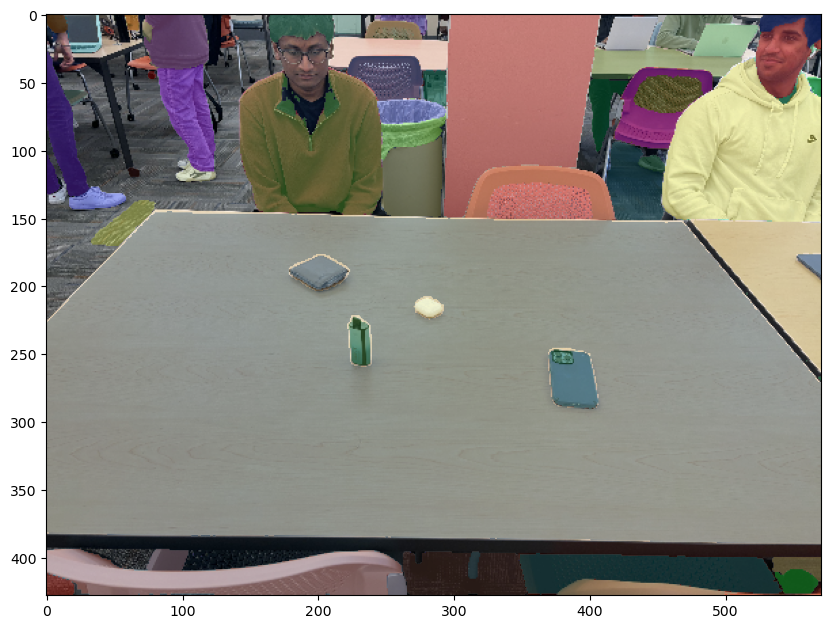

In [172]:
img_module.show_anns(masks)

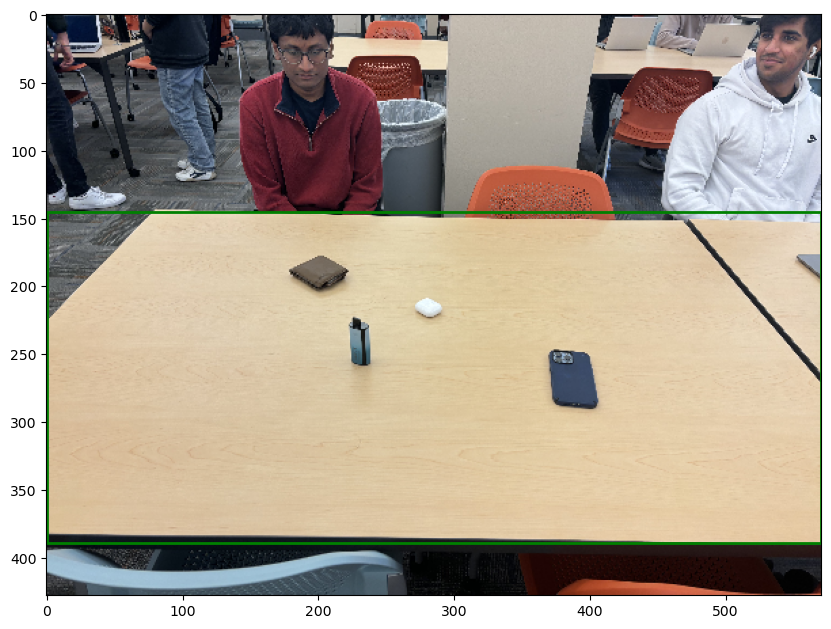

In [173]:
import utils.mask as mask_module

masks_on_table = mask_module.find_object_on_table(masks)
mask_table = mask_module.find_table(masks)

img_module.show_box(mask_table[0]["bbox"])

